In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [5]:
# Load the CSV file
df = pd.read_csv("sales_data_2015_2024.csv")
df

,Month,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Jan,93986,108234,89148,57293,66360,81797,97297,135082,146292,165149
1,Feb,97125,120042,53642,57014,51134,82582,91338,101789,118805,160930
2,Mar,103320,75424,57603,49828,52760,86306,112510,105438,168341,187765
3,Apr,68720,72259,54355,52459,48146,54434,100711,117398,170436,153738
4,May,71686,77001,61027,45552,53677,61057,103562,83488,159649,137626
5,Jun,66476,91836,67469,47545,49380,48797,107668,90264,167698,138730
6,Jul,76088,92595,51768,55226,51677,78398,132880,83211,156896,114407
7,Aug,87240,90395,58461,52784,37163,64645,107241,79532,166000,99161
8,Sep,86185,69874,46725,40533,36639,76404,81834,71592,156580,127635
9,Oct,82341,62380,57380,45284,62255,73725,104459,102424,133046,145420


In [6]:
# Transpose data to get years as rows and months as columns
df_t = df.set_index("Month").T
df_t.index.name = "Year"
df_t.reset_index(inplace=True)
df_t["Year"] = df_t["Year"].astype(int)

In [7]:
# Prepare input (X) and predictions dictionary
X = df_t["Year"].values.reshape(-1, 1)
month_columns = df_t.columns[1:]  # All months

In [8]:
# Store predictions for each month
predictions_2025 = {}

In [9]:
# Train and predict using linear regression for each month
for month in month_columns:
    y = df_t[month].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred_2025 = model.predict([[2025]])
    predictions_2025[month] = int(y_pred_2025[0])

In [10]:
# Convert predictions to DataFrame
predicted_df = pd.DataFrame(list(predictions_2025.items()), columns=["Month", "Predicted Sales 2025"])

# Define the correct month order
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Apply categorical ordering and sort
predicted_df["Month"] = pd.Categorical(predicted_df["Month"], categories=month_order, ordered=True)
predicted_df = predicted_df.sort_values("Month")

# Display predicted values
print(predicted_df)

   Month  Predicted Sales 2025
0    Jan                146463
1    Feb                124798
2    Mar                162302
3    Apr                153220
4    May                134289
5    Jun                136755
6    Jul                129710
7    Aug                115353
8    Sep                121666
9    Oct                136091
10   Nov                150255
11   Dec                157416


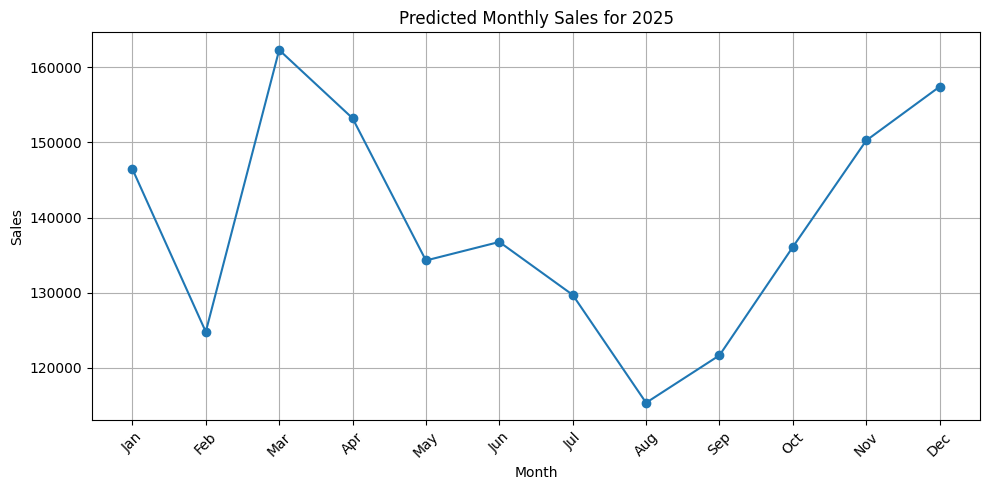

In [11]:
# Plot the predictions
plt.figure(figsize=(10, 5))
plt.plot(predicted_df["Month"], predicted_df["Predicted Sales 2025"], marker='o')
plt.title("Predicted Monthly Sales for 2025")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()